In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
iris=pd.read_csv('iris.csv')

In [3]:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [4]:
#to check for classification or regression model, we must check how many labels are present.
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

# Making a machine learning model

step1- Separation of training and testing data, i.e., independent & dependent variables

In [5]:
x=iris[['sepal_length','sepal_width','petal_length','petal_width']]
y= iris[['species']]

In [8]:
y=y['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})

In [12]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.3,random_state=6)

In [13]:
print(ytrain.value_counts())
print(ytest.value_counts())
#we should change the random_state value to get almost all values equal in ytrain n ytest

2    35
1    35
0    35
Name: species, dtype: int64
2    15
1    15
0    15
Name: species, dtype: int64


In [14]:
print(x.shape)
print(xtrain.shape)
print(xtest.shape)

(150, 4)
(105, 4)
(45, 4)


Step2- Declare an algorithm

In [15]:
from sklearn.neighbors import KNeighborsClassifier
k= KNeighborsClassifier(n_neighbors=5)

Step3- Train your model on the training data

In [16]:
#.fit()- to fit the model for the training data
k.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [20]:
#training accuracy
print(k.score(xtrain,ytrain))

#testing accuracy
print(k.score(xtest,ytest))

0.9809523809523809
0.9777777777777777


Step4- Making Predictions

In [24]:
#.predict()- predicts the output
k.predict([[4.8,3.9,0.8,1.9]])

array([0], dtype=int64)

In [25]:
#k-no. of neighbours
train_acc=[]
test_acc=[]
for i in range(1,20):
    km=KNeighborsClassifier(n_neighbors=i)
    km.fit(xtrain,ytrain)
    train_acc.append(km.score(xtrain,ytrain))
    test_acc.append(km.score(xtest,ytest))

<Figure size 576x432 with 0 Axes>

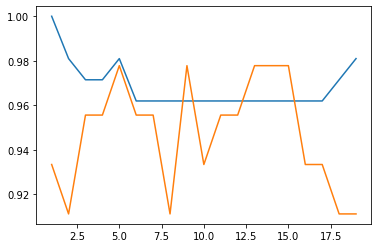

<Figure size 576x432 with 0 Axes>

In [27]:
plt.plot(range(1,20),train_acc)
plt.plot(range(1,20),test_acc)
plt.figure(figsize=(8,6))

In [28]:
#from the above graph, we find that near k=5, the accuracy is the best. Hence the value of k is chosen as 5.
#this means that no. of neighbours is 5

In [29]:
k.predict([[10.5,8.2,5.1,2.4]])

array([2], dtype=int64)

In [30]:
#to print the category of flower, we use-
fname=np.array(['setosa', 'versicolor', 'virginica'])
print(fname[k.predict([[10.5,8.2,5.1,2.4]])])

['virginica']
